In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
from PIL import Image

# https://github.com/keon/3-min-pytorch/blob/master/06-%EC%82%AC%EB%9E%8C%EC%9D%98_%EC%A7%80%EB%8F%84_%EC%97%86%EC%9D%B4_%ED%95%99%EC%8A%B5%ED%95%98%EB%8A%94_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94/denoising_autoencoder.py
# https://learnopencv.com/understanding-autoencoders-using-tensorflow-python/

In [3]:
train = pd.read_csv('data/old_data/train.csv')

In [4]:
train

id  digit letter  0  1  2  3  4  5  6  ...  774  775  776  777  778  \
0        1      5      L  1  1  1  4  3  0  0  ...    2    1    0    1    2   
1        2      0      B  0  4  0  0  4  1  1  ...    0    3    0    1    4   
2        3      4      L  1  1  2  2  1  1  1  ...    3    3    3    0    2   
3        4      9      D  1  2  0  2  0  4  0  ...    3    3    2    0    1   
4        5      6      A  3  0  2  4  0  3  0  ...    4    4    3    2    1   
...    ...    ...    ... .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
2043  2044      6      V  2  4  3  4  2  4  4  ...    0    2    2    0    0   
2044  2045      1      L  3  2  2  1  1  4  0  ...    2    3    4    2    1   
2045  2046      9      A  4  0  4  0  2  4  4  ...    2    3    1    1    3   
2046  2047      0      Z  2  3  3  0  3  0  4  ...    2    3    1    1    0   
2047  2048      5      Z  4  2  2  1  3  0  0  ...    4    2    4    0    4   

      779  780  781  782  783  
0       4    4    4    3    4  
1       1    4    2    1    2  
2       0    3    0    2    2  
3       4    0    0    1    1  
4       3    4    3    1    2  
...   ...  ...  ...  ...  ...  
2043    1    3    1    4    0  
2044    2    3    4    1    1  
2045    4    2    2    0    0  
2046    4    1    4    3    1  
2047    3    2    4    3    4  

[2048 rows x 787 columns]

In [261]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)

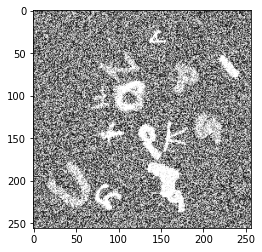

In [171]:
src = cv2.imread('tt.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(src, 'gray')

In [172]:
# blur_dst = cv2.medianBlur(src, 5)
blur_dst = cv2.bilateralFilter(src, 15, 15, 15)
plt.imshow(blur_dst, 'gray')

In [262]:
def clahe(img, clip_limit=4.0, tile_grid_size=(3, 3)):
    # if img.dtype != np.uint8:
    #     raise TypeError("ahe supports only uint8 inputs")

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    if len(img.shape) == 2:
        img = clahe.apply(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img[:, :, 0] = clahe.apply(img[:, :, 0])
        img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

    return img

In [263]:
idx = np.random.randint(x_train.shape[0])

img = x_train[idx]
plt.imshow(img, 'gray')
plt.show()

In [271]:
cimg.shape

(28, 28)

In [270]:
cimg = clahe(np.squeeze(img).astype(np.uint8))
plt.imshow(cimg, 'gray')


In [189]:
dst = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
plt.imshow(dst, 'gray')
plt.show()

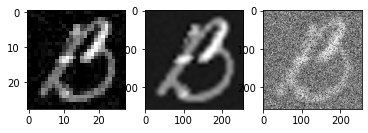

In [412]:
from PIL import Image
import numpy as np
from skimage.util import random_noise
# https://github.com/scikit-image/scikit-image/blob/master/skimage/util/noise.py

# im = Image.open("tt.png")
# # convert PIL Image to ndarray
# im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
gaussian_noise = random_noise(dst, mode='gaussian', var=0.5, seed=777)
poisson_noise = random_noise(dst, mode='poisson', seed=777)
snp_noise = random_noise(dst, mode='s&p', seed=777, amount=0.35, salt_vs_pepper=0.4)

plt.subplot(1, 3, 1)
plt.imshow(noise_img, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(poisson_noise, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(snp_noise, 'gray')
plt.show()

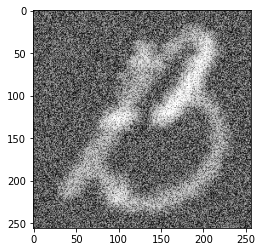

In [413]:
noisy_img = cv2.addWeighted(gaussian_noise, 0.5, poisson_noise, 0.5, 0)
plt.imshow(noisy_img, 'gray')

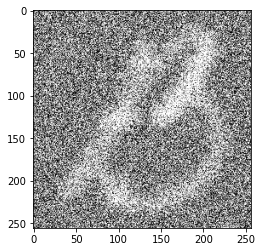

In [248]:
plt.imshow(gaussian_noise, 'gray')

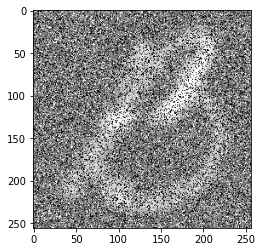

In [393]:
plt.imshow(snp_noise, 'gray')

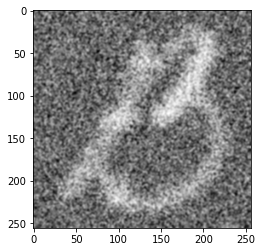

In [409]:
gaussiaan = cv2.GaussianBlur(gaussian_noise.astype(np.float32), (5, 5), 0)
plt.imshow(gaussiaan, 'gray')

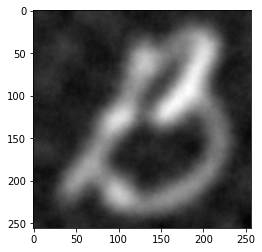

In [431]:
gaussiaan = cv2.bilateralFilter(gaussian_noise.astype(np.float32), 32, 35, 35)
plt.imshow(gaussiaan, 'gray')

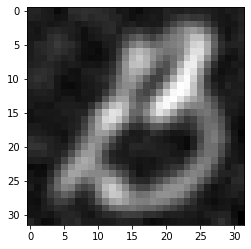

In [434]:
plt.imshow(cv2.resize(gaussiaan, dsize=(32,32)), 'gray')

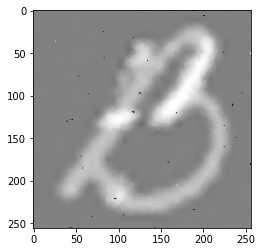

In [400]:
median = cv2.medianBlur(snp_noise.astype(np.float32), 5)
plt.imshow(median, 'gray')

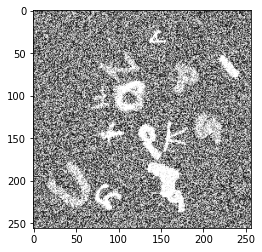

In [415]:
image = np.array(Image.open('tt.png').convert('L'))
plt.imshow(image, 'gray')

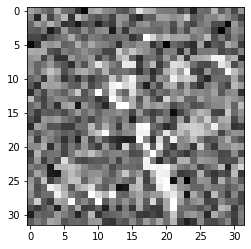

In [427]:
plt.imshow(cv2.resize(image, dsize=(32,32)), 'gray')

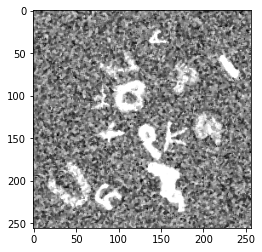

In [414]:
median = cv2.medianBlur(image.astype(np.float32), 3)
plt.imshow(median, 'gray')

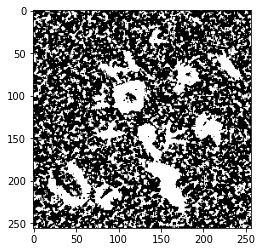

In [388]:
_, bin = cv2.threshold(median.astype(np.uint8), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(bin, 'gray')

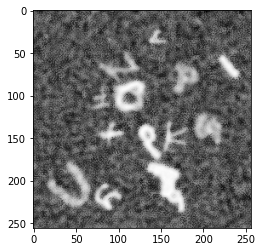

In [459]:
blur = cv2.bilateralFilter(image, 9, 150, 150)
plt.imshow(blur, 'gray')

In [340]:
blur = cv2.bilateralFilter(image, 12, 30, 75)
plt.imshow(blur, 'gray')

In [334]:
cimg = clahe((blur).astype(np.uint8))
plt.imshow(cimg, 'gray')